In [27]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'D:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set


In [28]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *
import time
import matplotlib.pyplot as plt

In [29]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/eligible_dates.txt


In [30]:
print(f"Eligible dates loaded: {eligible_dates}")

Eligible dates loaded: ['/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000316.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000331.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000414.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20001218.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010102.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010104.csv.gz', '/Users/khang/Desktop/ma

In [31]:
import pandas as pd
import os

results_path = path
for _ in range(3):
    results_path = os.path.dirname(results_path)
result_df_k = pd.read_csv(os.path.join(results_path, 'results', 'result_khang.csv'))
result_df_l = pd.read_csv(os.path.join(results_path, 'results', 'result_Cluster_Selection.csv'))

In [32]:
print(result_df_l.iloc[:, :12].head())

   num_dates num_med  num_clusters  win_threshold  cluster_selection  \
0        NaN    self            40          0.001              False   
1        NaN    self            40          0.001               True   
2        NaN    self            40          0.001               True   
3        NaN    self             5          0.001              False   
4        NaN    self            10          0.001              False   

   num_trading_clusters weight_type  winsorize_raw  winsorize_res  \
0                    40     uniform          False          False   
1                     5     uniform          False          False   
2                    10     uniform          False          False   
3                     5     uniform          False          False   
4                    10     uniform          False          False   

   winsor_param  sharpe_ratio  success_rate  
0           0.0      0.935421      0.527091  
1           0.0      0.855173      0.541011  
2           0.

In [33]:
result_df_l.iloc[[0]]

,num_dates,num_med,num_clusters,win_threshold,cluster_selection,num_trading_clusters,weight_type,winsorize_raw,winsorize_res,winsor_param,...,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00
0,NaN,self,40,0.001,False,40,uniform,False,False,0.0,...,-0.001397,0.000356,0.00256,-0.002923,0.005355,-0.000134,0.001155,0.000671,-0.000743,-0.000216


In [34]:
# Add the first dataline (row) from result_df_l to result_df_k as the first row
result_df_k = pd.concat([result_df_l.iloc[[0]], result_df_k], ignore_index=True)
print(result_df_k.iloc[:, :12].head())

   num_dates num_med  num_clusters  win_threshold  cluster_selection  \
0        NaN    self            40          0.001              False   
1        NaN    self            40          0.001              False   
2        NaN    self            40          0.001              False   
3        NaN    self            40          0.001              False   
4        NaN    self            40          0.001              False   

   num_trading_clusters  weight_type  winsorize_raw  winsorize_res  \
0                    40      uniform          False          False   
1                    40       linear          False          False   
2                    40  exponential          False          False   
3                    40      uniform           True          False   
4                    40      uniform          False           True   

   winsor_param  sharpe_ratio  success_rate  
0          0.00      0.935421      0.527091  
1          0.00      0.917903      0.614686  
2       

In [ ]:
result_df_k = result_df_k.iloc[:, 12:]
result_df_k

,2001-04-16 00:00:00,2001-04-17 00:00:00,2001-04-18 00:00:00,2001-04-19 00:00:00,2001-04-20 00:00:00,2001-04-23 00:00:00,2001-04-24 00:00:00,2001-04-25 00:00:00,2001-04-26 00:00:00,2001-04-27 00:00:00,...,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00
0,0.001344,-0.001685,-0.009769,0.000877,0.000819,0.002747,-0.000350,-0.002718,0.000292,0.001030,...,-0.001397,0.000356,0.002560,-0.002923,0.005355,-0.000134,0.001155,0.000671,-0.000743,-0.000216
1,0.001203,-0.003351,-0.013745,0.001971,0.001325,0.008868,-0.001039,-0.004931,0.004850,0.004464,...,-0.000703,-0.000453,0.003099,-0.002827,0.006989,-0.001370,0.002920,-0.000558,-0.001341,0.000725
2,0.000359,0.000163,-0.001706,-0.000288,0.000626,0.001572,-0.000072,-0.003080,0.000402,0.000625,...,-0.000791,-0.000159,0.001897,-0.002909,0.005793,-0.000034,0.001862,0.000535,-0.000733,0.000204
3,-0.000103,0.000232,-0.001133,0.000929,0.000618,0.003024,0.000285,-0.003024,-0.000164,-0.001432,...,-0.001535,0.000212,0.001842,-0.003082,0.005677,-0.000161,0.001256,0.000973,-0.001148,-0.000813
4,0.001752,-0.002389,-0.010409,-0.000550,-0.000224,0.002308,0.000036,-0.002907,0.000725,-0.000040,...,-0.000884,0.000796,0.002251,-0.003192,0.005172,-0.000661,0.001643,-0.001226,0.000752,0.000445
5,-0.000254,-0.000067,-0.001456,-0.000711,-0.000348,0.000849,0.000487,-0.002739,-0.000170,-0.001492,...,-0.002428,0.002158,0.002236,-0.004017,0.006374,-0.000160,0.001854,0.000791,-0.001601,-0.000875
6,0.000471,0.000224,-0.001874,0.000107,0.000252,0.000715,-0.000746,-0.003084,0.000389,0.001004,...,-0.000578,0.000165,0.002463,-0.003248,0.005845,-0.000004,0.001504,0.000571,-0.000945,-0.000229


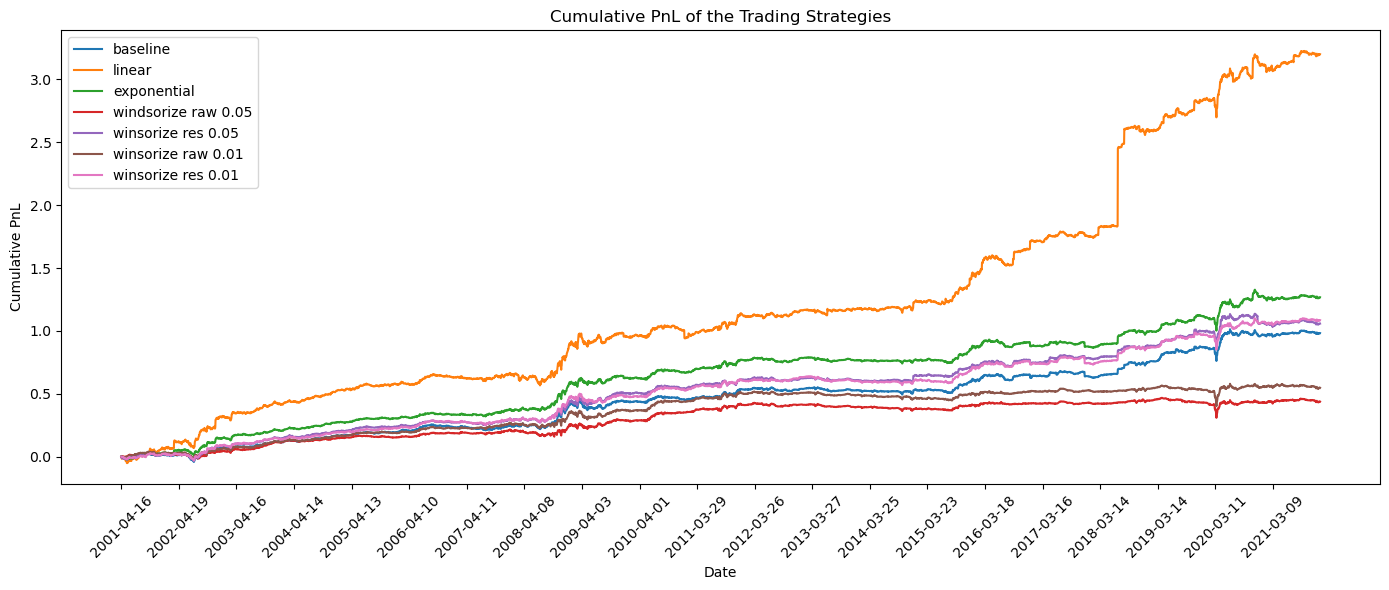

In [ ]:
culmulative_pnl_k = result_df_k.cumsum(axis=1).T
run_names = [
    'baseline',
    'linear',
    'exponential',
    'windsorize raw 0.05',
    'winsorize res 0.05',
    'winsorize raw 0.01',
    'winsorize res 0.01',
    # '2',
    # '3',
    # '4',
    # '5',
    # '6',    
    # '7',
    # '8',
    # '9',
]

culmulative_pnl_k.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL of the Trading Strategies')
plt.legend(run_names)

# Add more information to the x-axis
plt.xticks(
    ticks=range(0, len(culmulative_pnl_k.index), 250),
    labels=[pd.to_datetime(culmulative_pnl_k.index[i]).date() for i in range(0, len(culmulative_pnl_k.index), 250)],
    rotation=45
)

plt.tight_layout()
plt.show()

In [37]:
result_df_l = result_df_l.iloc[:, 12:]
result_df_l

,2001-04-16 00:00:00,2001-04-17 00:00:00,2001-04-18 00:00:00,2001-04-19 00:00:00,2001-04-20 00:00:00,2001-04-23 00:00:00,2001-04-24 00:00:00,2001-04-25 00:00:00,2001-04-26 00:00:00,2001-04-27 00:00:00,...,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00
0,0.001344,-0.001685,-0.009769,0.000877,0.000819,0.002747,-0.000350,-0.002718,0.000292,0.001030,...,-0.001397,0.000356,0.002560,-0.002923,0.005355,-0.000134,0.001155,0.000671,-0.000743,-0.000216
1,-0.001827,0.002131,-0.015941,-0.000181,-0.001042,0.002360,0.000485,-0.003366,0.000385,0.001168,...,-0.000809,0.000412,0.002088,-0.003236,0.006014,-0.000055,0.001735,0.000816,-0.001322,0.000136
2,-0.000213,0.001730,-0.011277,-0.002017,0.001123,0.003248,0.000469,-0.003107,0.000064,0.001107,...,-0.001094,0.000588,0.002064,-0.002846,0.005865,0.000174,0.002111,0.001333,0.000962,0.000589
3,0.000380,0.000572,-0.001430,-0.000768,-0.000483,0.001948,0.000952,-0.002811,0.000384,0.000903,...,-0.000494,0.000304,0.001865,-0.003378,0.006395,0.000232,0.002387,0.001095,0.001009,0.001074
4,0.000624,0.000537,-0.010914,-0.002320,0.000874,0.004120,0.000335,-0.002555,0.000003,0.001403,...,-0.000936,0.000421,0.001707,-0.003136,0.006158,0.000053,0.002118,0.000579,-0.001203,-0.000210
5,0.001222,-0.001560,-0.008911,0.000846,0.000015,0.002860,0.000706,-0.002787,0.000630,0.001817,...,-0.000155,0.000725,0.002049,-0.003606,0.005818,-0.000047,0.001756,0.001754,0.000788,0.001010
6,0.001279,-0.002438,-0.010158,0.000857,0.000286,0.003521,0.000204,-0.002493,-0.000335,0.001501,...,-0.000579,0.000283,0.002709,-0.003419,0.006086,-0.000411,0.001822,0.001117,0.000715,-0.000307
7,0.000004,0.000112,0.001651,-0.000243,-0.000606,0.001469,0.000488,-0.003494,-0.001143,0.000497,...,-0.000537,0.000093,0.001846,-0.002423,0.005517,-0.000397,0.002280,0.002089,0.000938,0.000961


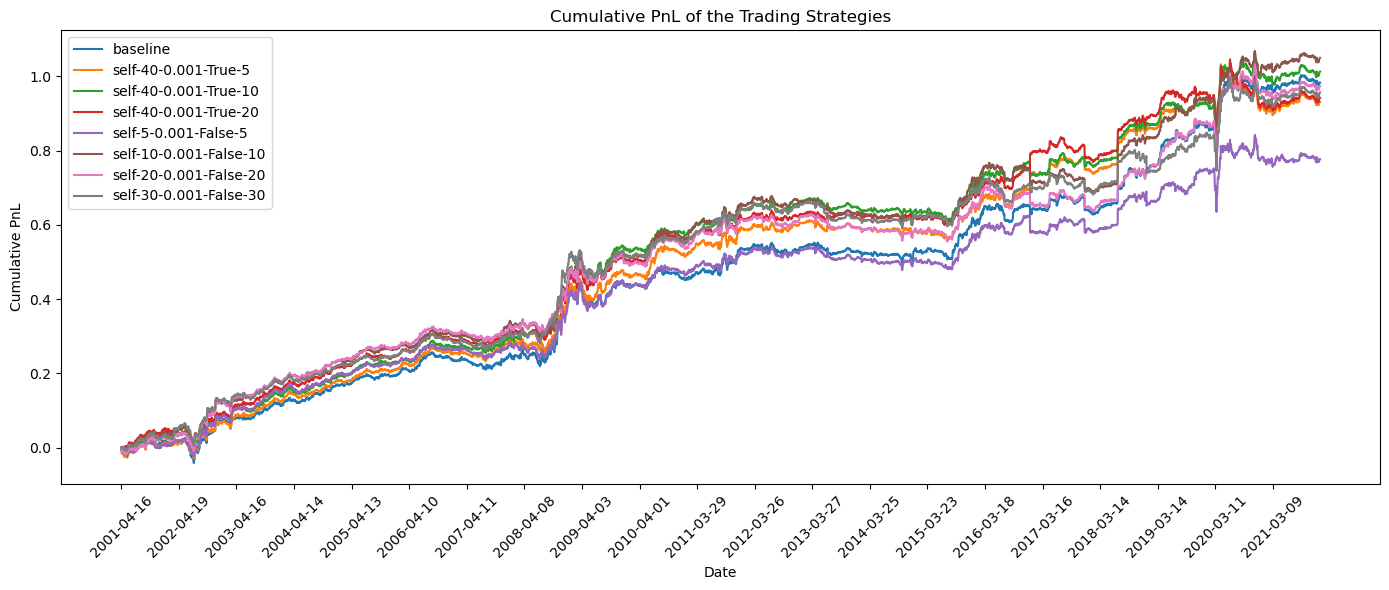

In [41]:
culmulative_pnl_l = result_df_l.cumsum(axis=1).T
run_names = [
    'baseline',
    'self-40-0.001-True-5',
    'self-40-0.001-True-10',
    'self-40-0.001-True-20',
    # 'self-40-0.001-True-30',
    'self-5-0.001-False-5',
    'self-10-0.001-False-10',
    'self-20-0.001-False-20',
    'self-30-0.001-False-30'
]

culmulative_pnl_l.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL of the Trading Strategies')
plt.legend(run_names)

# Add more information to the x-axis
plt.xticks(
    ticks=range(0, len(culmulative_pnl_l.index), 250),
    labels=[pd.to_datetime(culmulative_pnl_l.index[i]).date() for i in range(0, len(culmulative_pnl_l.index), 250)],
    rotation=45
)

plt.tight_layout()
plt.show()